# Setup

In [1]:
#
# Download https://github.com/smutchler/trilabytePyML to a ZIP file and
# place subfoler into C:\
#
# You should have this exact path when done correctly: C:\TrilabytePyML\trilabytePyML\AutoForecast.py

In [11]:
import sys

if 'TrilabytePyML' not in sys.path:
    sys.path.insert(1, 'C:\\TrilabytePyML')

# Data Preparation

In [12]:
import pandas as pd

pd.options.mode.chained_assignment = None

frame = pd.read_csv('C:\\TrilabytePyML\\samples\\retail_unit_demand.csv')
display(frame)

,SKU,STORE_NUMBER,CAL_YEAR,CAL_MONTH,CAL_DATE,UNIT_DEMAND,PREDICTOR_1,PREDICTOR_2,PREDICTOR_3,PREDICTOR_4
0,1100,1150,2016,3,3/1/2016,16.0,1.856107,4.916073,6.350111,0.170545
1,1100,1150,2016,4,4/1/2016,28.0,9.803075,5.647253,40.128298,0.190157
2,1100,1150,2016,5,5/1/2016,35.0,3.598739,15.927959,29.807851,0.006683
3,1100,1150,2016,6,6/1/2016,129.0,1.155522,48.465667,17.236057,0.007743
4,1100,1150,2016,7,7/1/2016,179.0,9.673028,6.603080,39.144862,0.230874
...,...,...,...,...,...,...,...,...,...,...
113,1733,993243,2019,8,8/1/2019,NaN,5.563396,13.576681,12.819330,0.038417
114,1733,993243,2019,9,9/1/2019,NaN,6.663194,43.053491,11.374827,0.144381
115,1733,993243,2020,10,10/1/2020,NaN,2.270636,29.233220,59.000652,0.288833
116,1733,993243,2020,11,11/1/2020,NaN,4.903307,49.802078,27.008816,0.017463


# Forecast Options

In [13]:
options = dict()
options['method'] = 'Auto' #'Auto','MLR','ARIMA','Prophet'
options['sortColumns'] = ['SKU','STORE_NUMBER','CAL_YEAR','CAL_MONTH']
options['splitColumns'] = ['SKU','STORE_NUMBER']
options['predictorColumns'] = ['PREDICTOR_1','PREDICTOR_2','PREDICTOR_3','PREDICTOR_4']
options['targetColumn'] = 'UNIT_DEMAND'
options['timestampColumn'] = 'CAL_DATE' #only needed by Prophet model  
options['periodicity'] = 12
options['autoDetectOutliers'] = True
options['outlierStdevMultiplier'] = 3.0
options['seasonalityBandwidth'] = 0.6
options['scalePredictors'] = True # MLR only; if true X_COEFFICIENTS become variable importances
options['ridgeAlpha'] = 1.0
options['forceNonNegative'] = True
options['seasonality'] = 'Auto' #'Auto','Additive','Multiplicative'
options['hypertune'] = False
# how may rows are used for holdout (MAPE calculation)
options['numHoldoutRows'] = 6
# pass-through to FBProphet
options['interval_width'] = 0.95
options['changepoint_prior_scale'] = 0.05 
options['holidays_prior_scale'] = 10.0
options['changepoints_fraction'] = 0.1 # number of change points allowed as fraction of rowcount

# Visualizations (first frame only)

In [14]:
# limit data to first combination (so that visualizations below work)
firstFrame = frame[frame['SKU'] == 1100].dropna()

C:\Users\u277445\Anaconda3\lib\site-packages\pmdarima\utils\visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


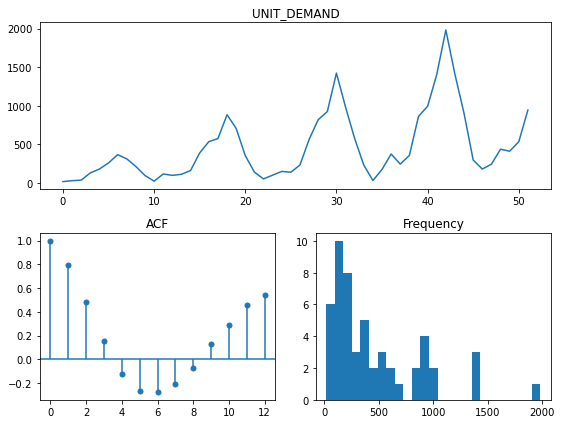

In [15]:
import pmdarima as pm

# Time Series Plot, ACF Plot and Histogram of Frequency
pm.tsdisplay(firstFrame[options['targetColumn']], lag_max=options['periodicity'], title=options['targetColumn'], show=True) 

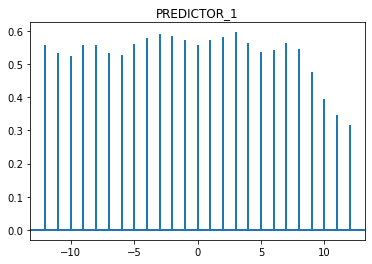

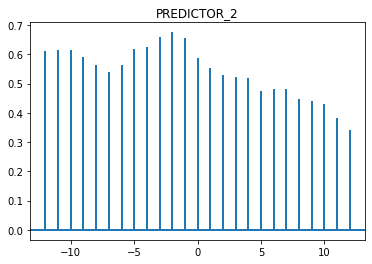

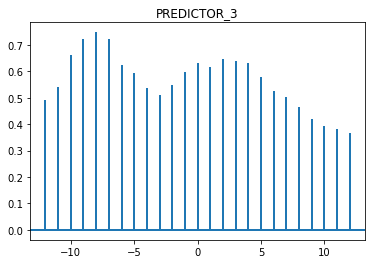

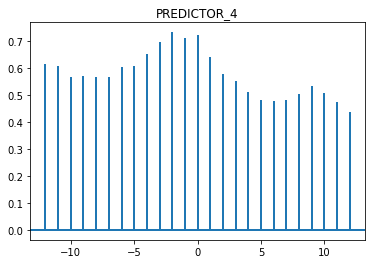

In [16]:
import matplotlib.pyplot as plt
import numpy as np

for predCol in options['predictorColumns']:
    if (predCol != 'X_INDEX'):
        plt.xcorr(firstFrame[predCol], firstFrame[options['targetColumn']], usevlines=True, maxlags=options['periodicity'], normed=True, lw=2)
        plt.title(predCol)
        plt.show()

In [17]:
import seaborn as sns

def cross_correlation_heatmap(cc_df):
    # Credit to Bibor Szabo
    # https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
    
    plt.figure(figsize=(16, 6))

    mask = np.triu(np.ones_like(cc_df.corr(), dtype=np.bool))
    heatmap = sns.heatmap(cc_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Triangle Cross Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
    plt.savefig('cc_heatmap.png', dpi=300, bbox_inches='tight')
       
    return()

()

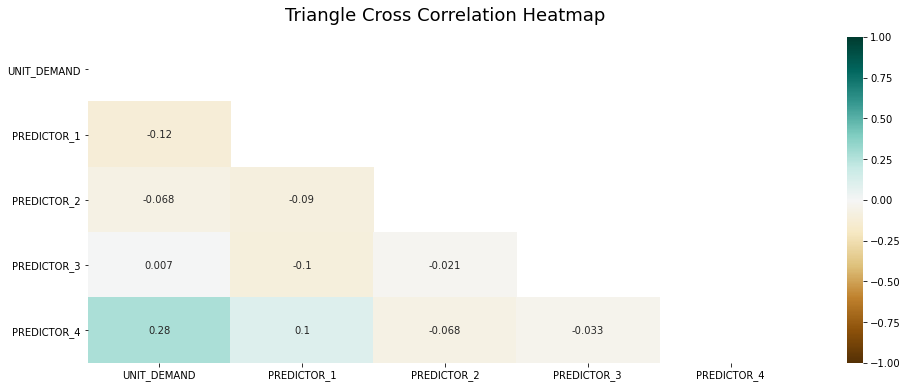

In [18]:
all_vars = [options['targetColumn']] + options['predictorColumns']
if ('X_INDEX' in all_vars):
    all_vars.remove('X_INDEX')
cross_correlation_heatmap(firstFrame[all_vars])

# Forecast Generation

In [19]:
import trilabytePyML.AutoForecast as af

frame = af.splitFramesAndForecast(frame, options)

display(frame)

Importing plotly failed. Interactive plots will not work.


Auto MAPEs (MLR, ARIMA, Prophet, Ensemble):  [47.46557626680613, 75.40661316908448, 40.622321482734755, 33.79455472925159]
Auto MAPEs (MLR, ARIMA, Prophet, Ensemble):  [31.364660296868387, 48.197459207651804, 33.53351118235305, 16.40829063754941]


,SKU,STORE_NUMBER,CAL_YEAR,CAL_MONTH,CAL_DATE,UNIT_DEMAND,PREDICTOR_1,PREDICTOR_2,PREDICTOR_3,PREDICTOR_4,...,X_SEASONALITY_TYPE,X_FORECAST,X_MAPE,X_RESIDUAL,X_LPI,X_UPI,X_APE,X_HYPERTUNE,X_ERROR,X_METHOD
0,1100,1150,2016,3,3/1/2016,16.0,1.856107,4.916073,6.350111,0.170545,...,None,11.188387,33.794555,424.073172,0.000000,1221.101868,30.07258,None,None,Ensemble
1,1100,1150,2016,4,4/1/2016,28.0,9.803075,5.647253,40.128298,0.190157,...,None,27.244017,33.794555,381.162481,0.000000,504.987638,2.699938,None,None,Ensemble
2,1100,1150,2016,5,5/1/2016,35.0,3.598739,15.927959,29.807851,0.006683,...,None,64.379571,33.794555,371.243314,0.000000,421.965017,83.941632,None,None,Ensemble
3,1100,1150,2016,6,6/1/2016,129.0,1.155522,48.465667,17.236057,0.007743,...,None,125.277525,33.794555,249.616174,0.000000,414.456998,2.88564,None,None,Ensemble
4,1100,1150,2016,7,7/1/2016,179.0,9.673028,6.603080,39.144862,0.230874,...,None,302.026617,33.794555,233.089107,0.000000,710.013647,68.729953,None,None,Ensemble
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1733,993243,2019,8,8/1/2019,NaN,5.563396,13.576681,12.819330,0.038417,...,None,1408.752961,16.408291,NaN,1029.583695,1683.008078,NaN,None,None,Ensemble
114,1733,993243,2019,9,9/1/2019,NaN,6.663194,43.053491,11.374827,0.144381,...,None,1489.757703,16.408291,NaN,1097.260565,1679.856307,NaN,None,None,Ensemble
115,1733,993243,2020,10,10/1/2020,NaN,2.270636,29.233220,59.000652,0.288833,...,None,1428.558554,16.408291,NaN,1010.534419,1616.890740,NaN,None,None,Ensemble
116,1733,993243,2020,11,11/1/2020,NaN,4.903307,49.802078,27.008816,0.017463,...,None,870.886077,16.408291,NaN,784.614071,1109.464610,NaN,None,None,Ensemble


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


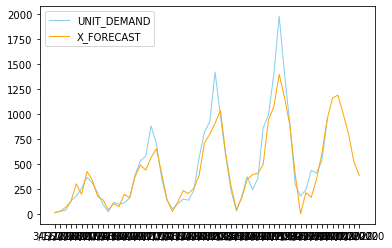

In [27]:
firstFrame = frame[frame['SKU'] == 1100]


plt.plot(options['timestampColumn'],options['targetColumn'], data=firstFrame, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=1)
plt.plot(options['timestampColumn'],'X_FORECAST', data=firstFrame, marker='', markerfacecolor='orange', markersize=12, color='orange', linewidth=1)
plt.legend()

In [6]:
frame.to_csv('c:\\temp\\output.csv')